# Explorityor Data Analysis - Mercari


In [4]:
!pip install -q gdown

import gdown

file_id = "1lvt_himfQapYiUPbaS07dONMZ718cfk0"
gdown.download(id=file_id, output="Mercari-dataset.tsv", quiet=False)


Downloading...
From (original): https://drive.google.com/uc?id=1lvt_himfQapYiUPbaS07dONMZ718cfk0
From (redirected): https://drive.google.com/uc?id=1lvt_himfQapYiUPbaS07dONMZ718cfk0&confirm=t&uuid=0cb33007-581c-4cf0-b44c-b6a2c022e35d
To: /content/Mercari-dataset.tsv
100%|██████████| 338M/338M [00:04<00:00, 69.1MB/s]


'Mercari-dataset.tsv'

# Initial thoughts
1. 3 messy string features: description, category_name, and name.
2. 1 simple binary feature: shipping.
3. 1 simple ordinal categorical feature: item_condition_id.
4. 1 high-cardinality categorical feature: brand_name.
5. 1 identifier: train_id (to be dropped).

In [9]:
import pandas as pd
df = pd.read_csv("Mercari-dataset.tsv", sep="\t")
df.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity


# Target variable

Goal: supervised regression model to accurately predict product listing prices based on given information.

The target was right-skewed. I corrected this by applying a log transformation, and the resulting distribution was much more balanced.

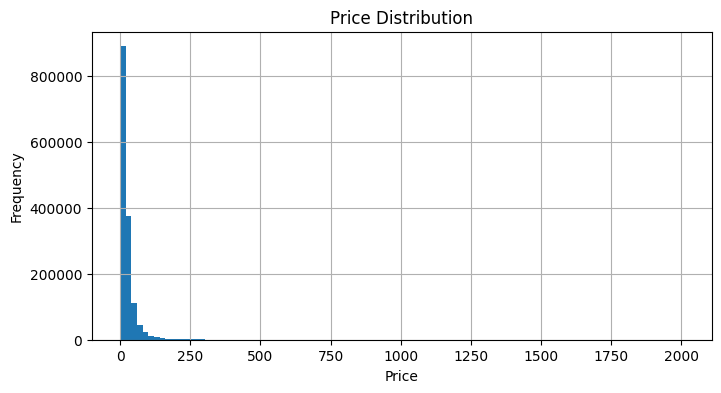

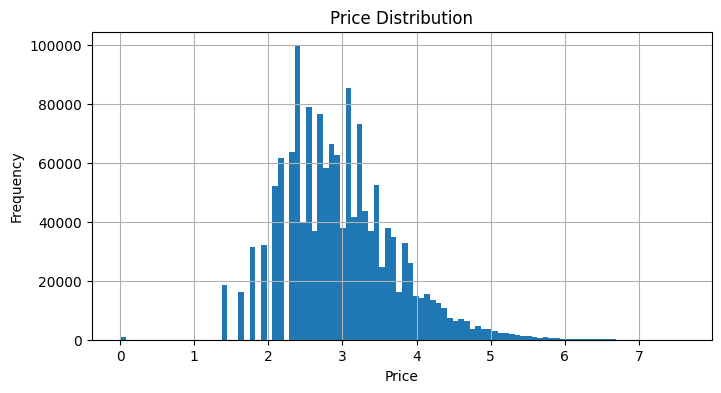

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
df['price'].hist(bins=100)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

df['log_price'] = np.log1p(df['price'])

plt.figure(figsize=(8, 4))
df['log_price'].hist(bins=100)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

#Categorical and binary features

1. item_condition_id will be treated with a simple ordinal encoder, implicitly preserving its order.
2. shipping will remain a binary integer.
3. brand_name has high cardinality, so I will start with target encoding and test other strategies during tuning, such as binning or bucketing.

In [11]:
print("Unique values in brand_name:")
print(df['brand_name'].unique())

print("\nUnique values in item_condition_id:")
print(df['item_condition_id'].unique())


Unique values in brand_name:
[nan 'Razer' 'Target' ... 'Astroglide' 'Cumberland Bay' 'Kids Only']

Unique values in item_condition_id:
[3 1 2 4 5]


# Messy string features
category_name is hierarchical meaning:
- cat1: broad ex; electronics
- cat2: subcategory ex; computers & laptops
- cat3: sub-subcategory ex; components and parts

This structure makes label encoding a strong choice.
- The original category_name column will be dropped after splitting.

## name and item_description preprocessing plan:
1. Clean the fields: lowercase, remove filler text, etc.

2. Extract features: text length, word count, etc.

3. TF-IDF vectorization: automatic tokenization and weighting

4. Combine all features: numeric, categorical, engineered, and vectorized text into a single 2D input matrix (as required by supervised learning models)

# Final thoughts
Binary and categorical features will be a simple preprocessing proccess, followed by a clear testing strategy during tuning.

The only numeric feature is the target (price), which only needs a simple log transformation.

The string-based text features will require the most preprocessing and are likely where the majority of optimization gains will come from.

